# Misophonia Data Analysis 



First, we started by loading the dataset:

## Table 1

In [1]:
#Importing the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from summarytools import dfSummary
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from tabulate import tabulate
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')



# Setting the display options and reading the data
pd.set_option('display.max_columns', None)
df = pd.read_excel('https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2024/raw/master/datasets/misophonia_data.xlsx')
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Misofonia[object],1. si2. no3. nan,82 (59.4%)41 (29.7%)15 (10.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABFCAYAAABdVZTTAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABmElEQVR4nO3bQWrCUBRG4ZsSpE4SguBiXEQX20VkN0F8gypO0oELaMBwHq/3fCu4yEFJ8O/WdQ2J8FH7AOXRRcQxIg61D0nkua7rvfYRNfSn0+lrGIap9iFZlFKuXdd9ZwyuH4Zhulwu93EcH7WP+e9ut9vnPM/TsiyHiMgXW0TEOI6P8/n8U/uYJI61D6jFBwRhjE0YYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE2YPuL1P6vah2SQ/XPuSynXeZ6nSPw/K1Ip5RoRz9p31OAGgZd2g9A55ROl5W+2tN8QrWp2XZV5pdSqJtdV2VdKrWp5XeXTc2N8qSuMsQljbMIYmzDGJoyxCWNswhibMMYmjLEJY2zCGJswxiaMsQnT5LqqtXv10uy6KvNKqVVuEIRxXSWMDwjC7PUz6k+a/rTLlM9ZnbZ4e8rnrE5b7TXla+q1ierwAUEYYxPG2IQxNmGMTRhjE8bYhDE2YYxNGGMTxtiEMTZhjE0YYxPm7SmfszpttcuUz1mdtnCDIIxTPmF+AUq8o0oiYwS9AAAAAElFTkSuQmCC"">",15(10.9%)
2,Misofonia.dic[float64],1. 0.02. 2.03. 3.04. nan5. 4.06. 1.0,41 (29.7%)37 (26.8%)31 (22.5%)15 (10.9%)9 (6.5%)5 (3.6%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAACKCAYAAAC96ziyAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACo0lEQVR4nO3bQW7aQACF4XGFomZjhJA4DIfoYXsI3wYhvGiibNxFlk1SuzbPHvp9J5jFr0GD/JphGAokfFv7APw/xEaM2IgRGzFNKeW5lPK09kH+wdswDC9rH4Lxdsfj8Ufbtoe1DzJV3/fXpml+Cq4eu7ZtD+fz+WW/37+ufZixbrfb967rDpfL5amUIrZK7EopZb/fv55Op19rH2ai57UPwDQeCMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGzK6U90921j7IFLWdl3e7vu+vXdcdSmWf7PR9fy2lvK19DsbzWTgxjZEyKTXdbG6yylUzeDFwqV8VgxcDl8dQ0+Clqtcyf/KnLjFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZiqlhXbf18jFPNusqaqn42CMRYVxGztZvN7fXANrWusqB6bJtZV1lQPb6tras2/SJmHn/qEiM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNmM+uqLZyB+9rUusqC6rHZIBBjXUXMUjebG4m/WmRdZRXFGLPXVVZRjLXUumr1lyzb509dYsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNm9uDFUIWxFhm8GKowhs/CiTF4IcYDgZgpP6N+Kpll9LrKgoq5Rq2rLKhYwpR1lQUVs3ggECM2YsRGjNiIERsxYiNGbMSIjRixESM2YsRGjNiIERsxo9ZVFlQsYfS6yoKKuXwWTox1FTFf3WxuMhb16eDFwIWlfTh4MXDhHr4avBi4sCh/6hIjNmLERozYiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIj5sN1lTUV9/DpusqaiqXZIBBjXUWMBwIxYiNGbMT8BuNNQ6bvV6PmAAAAAElFTkSuQmCC"">",15(10.9%)
3,Estado[object],1. casado2. soltero3. divorciado4. nan5. viuda,64 (46.4%)29 (21.0%)26 (18.8%)15 (10.9%)4 (2.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACR0lEQVR4nO3bwWnjQACF4dFiwuYiYQwuxkVssVuEujHGOiQhF+1hTyGGGCy9EZ7vq2AwPxIy87p5ngsk/Kp9ANohNmLERkxXSnktpbzUPsiGfc7z/F77EM9gdzgc/vR9v699kK2apunSdd1fwT1u1/f9/nQ6vQ/D8FH7MFtzvV5/j+O4P5/PL6UUsT1oV0opwzB8HI/Ht9qH2ajX2gd4Fj4QiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2YXSn/r9LUPsgW+V2WtZum6TKO4764SnPTNE2XUspn7XM8A9fCf+Za+EI6u1FSfCAQs5XXqFdVAzaxrrJgakP1dZUFUzu2sq7yt0sDfCAQIzZixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzHV11UWTO3YxLrKgqkNroUTY11FjA8EYmq9Rr02G1RlXWVN1ab4usqaql211lXWVA3ygUCM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxMTXVdZU7aqyrrKmapNr4cRYVxGz1JPNk4ofLTJ4MWDhHg8PXgxYuNdSgxcDFn7kT11ixEaM2IgRGzFiI0ZsxIiNGLERIzZixEaM2IgRGzFiI0ZsxDy8rrKW4l6LrKuspbiHDQIx1lXE3HqyeUqxim/rKksp1vJlXWUpxZpurasspViFP3WJERsxYiNGbMSIjRixESM2YsRGjNiIERsxYiNGbMSIjRixEfNlXWUpxZq+rasspViLDQIx1lXE+EAgRmzE/APHMQ43+m6oagAAAABJRU5ErkJggg=="">",15(10.9%)
4,Estado.dic[float64],1. 1.02. 0.03. 2.04. nan5. 3.0,64 (46.4%)29 (21.0%)26 (18.8%)15 (10.9%)4 (2.9%),"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABzCAYAAACPdnBjAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjkuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/TGe4hAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACR0lEQVR4nO3bwWnjQACF4dFiwuYiYQwuxkVssVuEujHGOiQhF+1hTyGGGCy9EZ7vq2AwPxIy87p5ngsk/Kp9ANohNmLERkxXSnktpbzUPsiGfc7z/F77EM9gdzgc/vR9v699kK2apunSdd1fwT1u1/f9/nQ6vQ/D8FH7MFtzvV5/j+O4P5/PL6UUsT1oV0opwzB8HI/Ht9qH2ajX2gd4Fj4QiBEbMWIjRmzEiI0YsREjNmLERozYiBEbMWIjRmzEiI2YXSn/r9LUPsgW+V2WtZum6TKO4764SnPTNE2XUspn7XM8A9fCf+Za+EI6u1FSfCAQs5XXqFdVAzaxrrJgakP1dZUFUzu2sq7yt0sDfCA

After loading the data in **Table 1** as seen above, we decided to create a correlation matrix to avoid having to individually test the relationship between all the variables. The correlation matrix, **Figure 1**, simultaneously tests each combination of variables through a pearson correlation.


## Figure 1

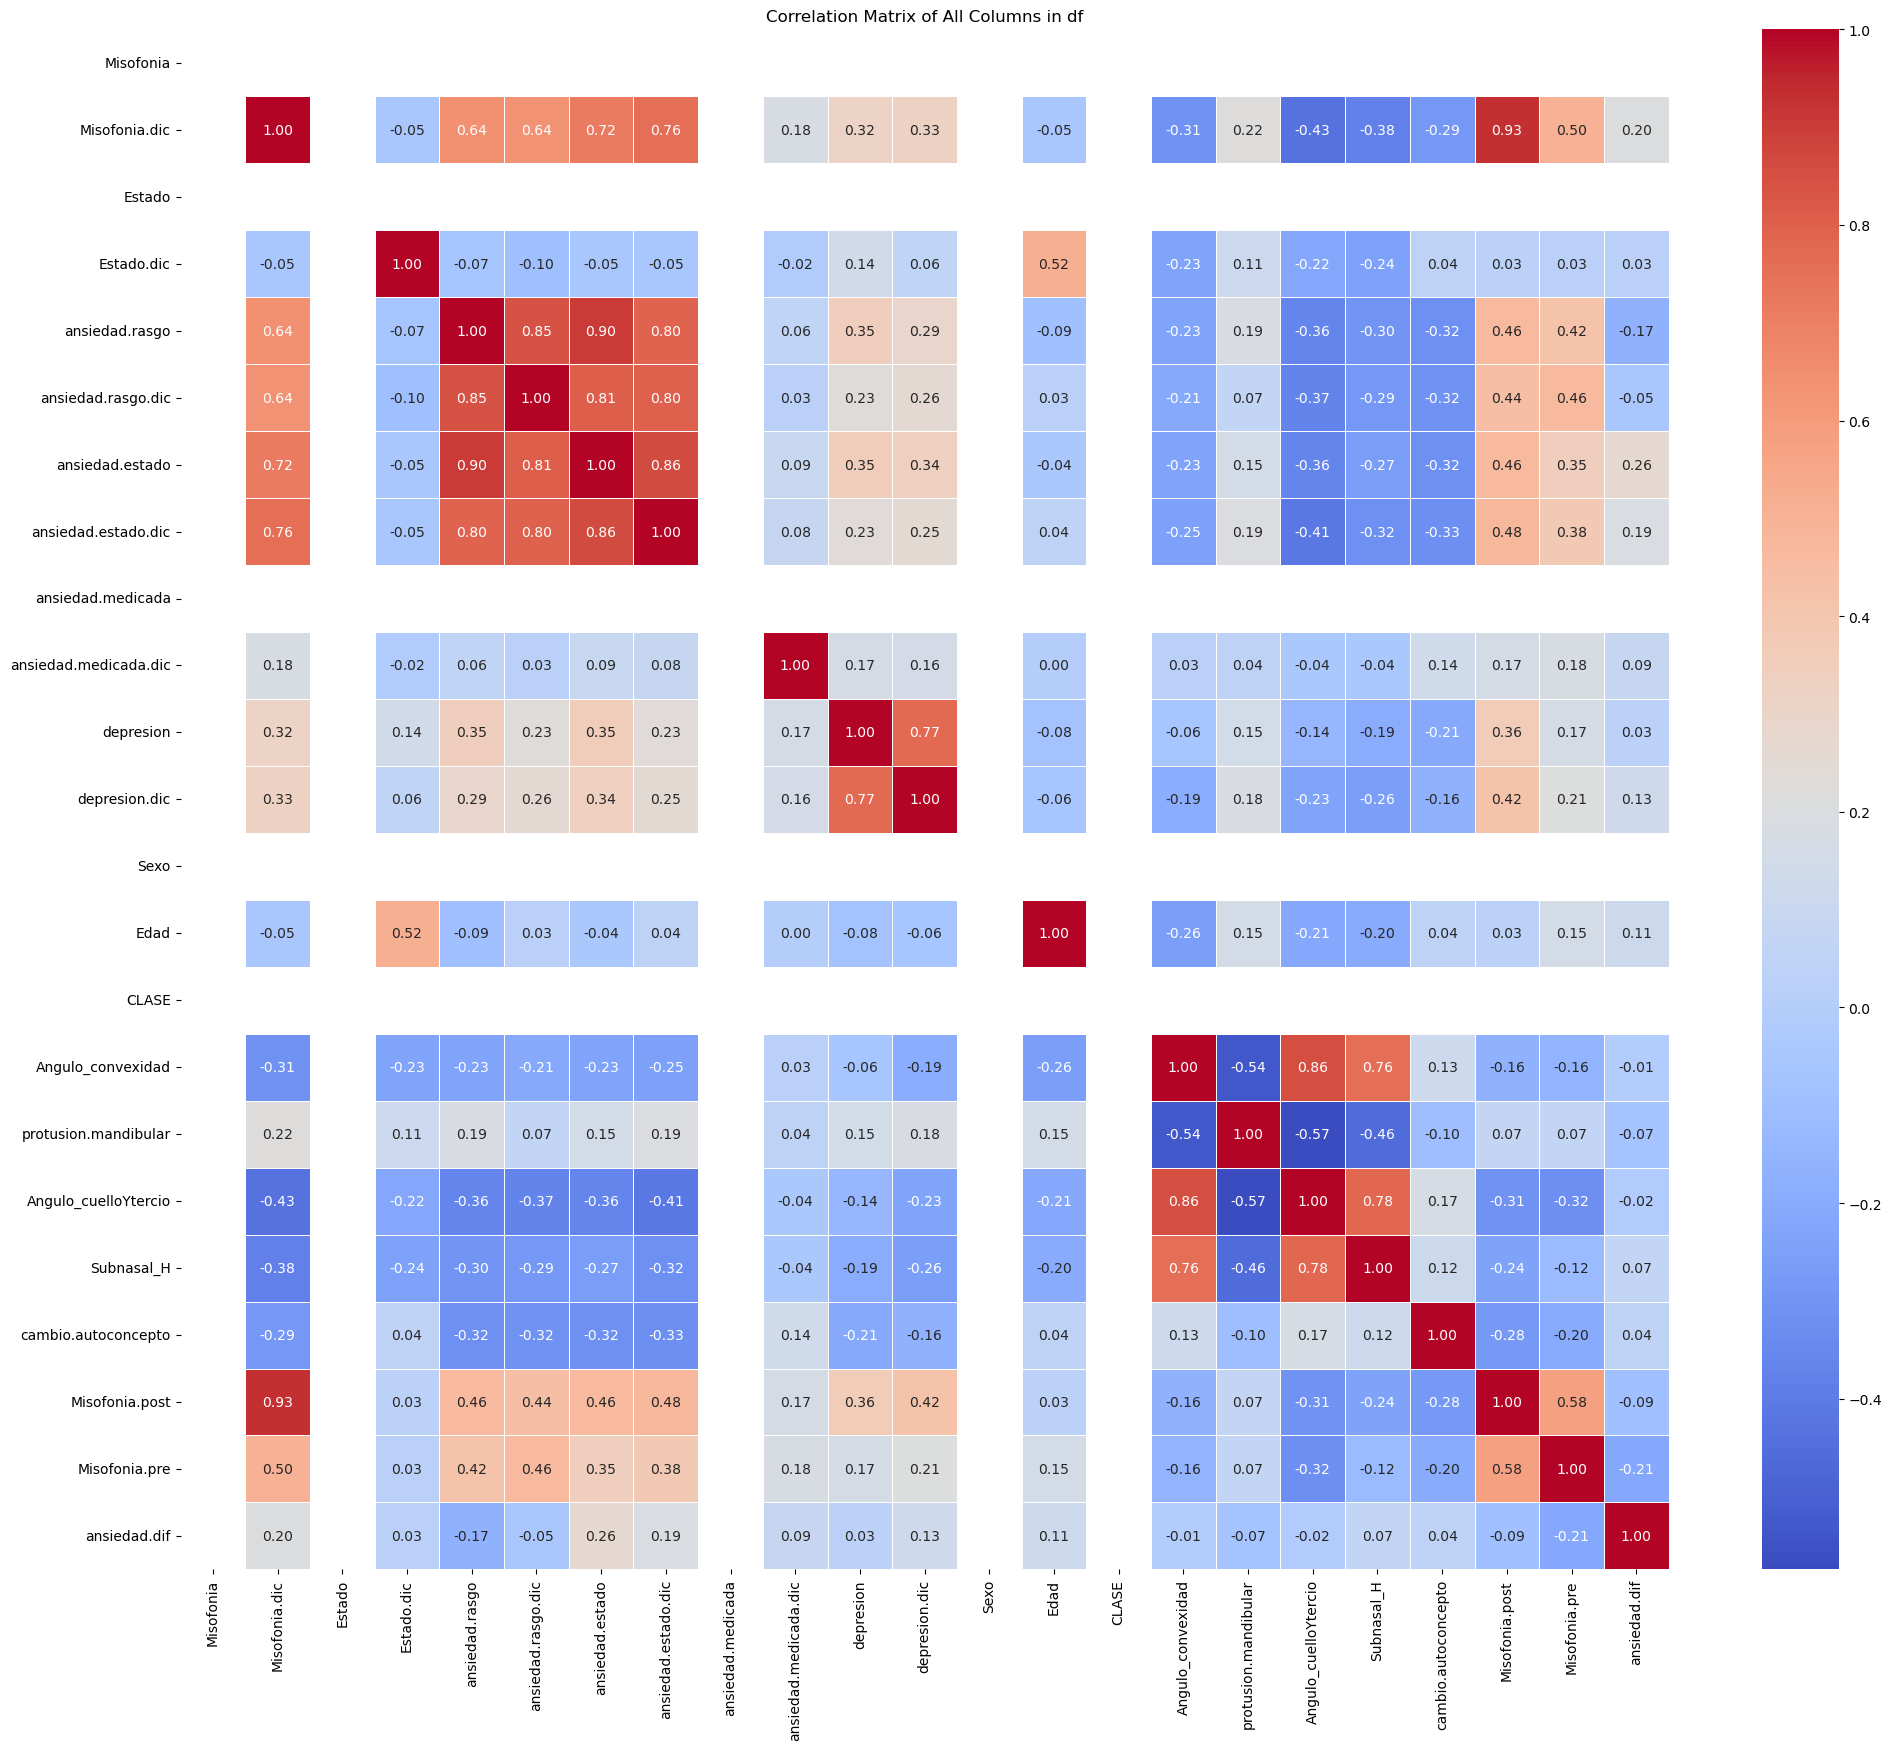

In [2]:
# Convert non-numeric columns to numeric where possible, or drop them
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr(method='pearson')

# Display the correlation matrix
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of All Columns in df')
plt.show()


From visually analyzing **Figure 1**, we decided to test the correlation between two variables: ansiedad.estado and Angulo_cuelloYtercio.
 

## Figure 2

Correlation: -0.36


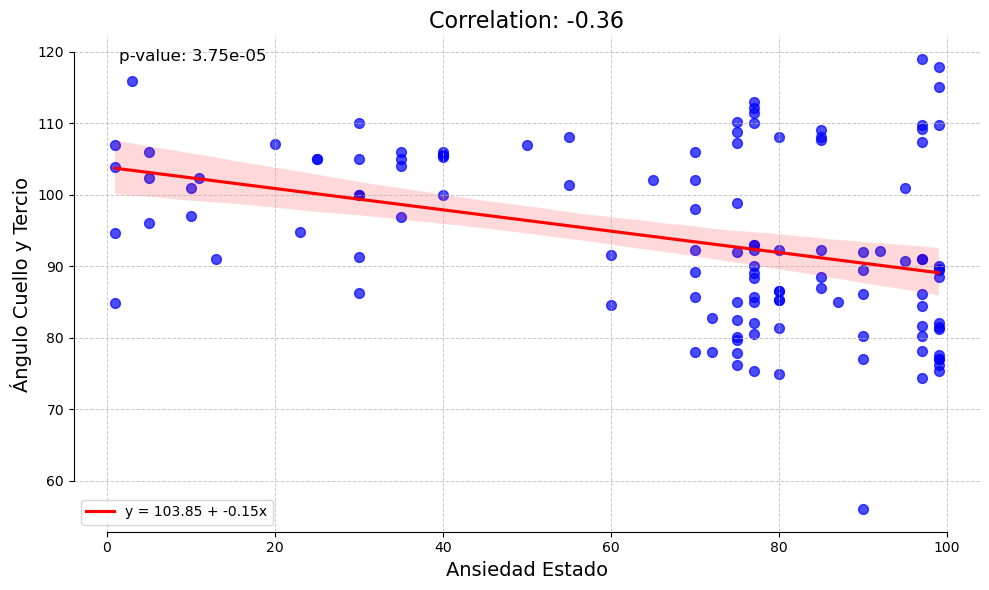

In [3]:
# Drop rows with NaN or infinite values in the relevant columns
mask_ansiedad_cuello = df[['ansiedad.estado', 'Angulo_cuelloYtercio']].replace([np.inf, -np.inf], np.nan).dropna()
df_clean_ansiedad_cuello = df.loc[mask_ansiedad_cuello.index].copy()

# Calculate the correlation
correlation = df_clean_ansiedad_cuello['ansiedad.estado'].corr(df_clean_ansiedad_cuello['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation:.2f}")

# Fit the linear regression model
X = sm.add_constant(df_clean_ansiedad_cuello['ansiedad.estado'])  # Adds a constant for the intercept
model = sm.OLS(df_clean_ansiedad_cuello['Angulo_cuelloYtercio'], X).fit()
slope, intercept = model.params[1], model.params[0]
p_value = model.pvalues[1]

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='ansiedad.estado', y='Angulo_cuelloYtercio', data=df_clean_ansiedad_cuello, 
            scatter_kws={'s': 50, 'color': 'blue', 'alpha': 0.7}, 
            line_kws={'color': 'red', 'label': f'y = {intercept:.2f} + {slope:.2f}x'})

# Add title, labels, and p-value
plt.title(f'Correlation: {correlation:.2f}', fontsize=16)
plt.xlabel('Ansiedad Estado', fontsize=14)
plt.ylabel('Ángulo Cuello y Tercio', fontsize=14)
plt.text(0.05, 0.95, f'p-value: {p_value:.2e}', transform=plt.gca().transAxes, fontsize=12)


# Customize and show the plot
sns.despine(trim=True)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


By plotting the linear regression in **Figure 2**, we can see that ansiedad.estado and angulo_cuelloYtercio have a negative, statistically significant, correlation. Therefore, it can be concluded that the higher the state of anxiety of a patient, the lower the angle between the neck and third.

Next, we decided to perform an ANOVA to test the correlation between ansiedad.rasgo, estado, and clase, as well as the correlation between all three at once (synergy).


## Table 2, Figure 3

In [4]:
# Rename column in df
df_figure2=df.copy()
df_figure2.rename(columns={'depresion.dic': 'depresion_binary', "ansiedad.rasgo": "ansiedad_rasgo"}, inplace=True)

# Fit the OLS model
model = ols('ansiedad_rasgo ~ C(Estado) * C(CLASE)', data=df_figure2).fit()

# Perform ANOVA
anova_result = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table in a more readable format

print(tabulate(anova_result, headers='keys', tablefmt='pretty'))

+--------------------+--------------------+-------+--------------------+------------------------+
|                    |       sum_sq       |  df   |         F          |         PR(>F)         |
+--------------------+--------------------+-------+--------------------+------------------------+
|     C(Estado)      | 1282.4935076624981 |  3.0  | 0.867746228311253  |   0.3535659680896541   |
|      C(CLASE)      | 40646.33828446451  |  2.0  | 41.25249741648895  | 3.5360069863899084e-14 |
| C(Estado):C(CLASE) | 1813.824669021106  |  6.0  | 0.6136247497383709 |   0.6536869170295915   |
|      Residual      | 55669.79593711358  | 113.0 |        nan         |          nan           |
+--------------------+--------------------+-------+--------------------+------------------------+


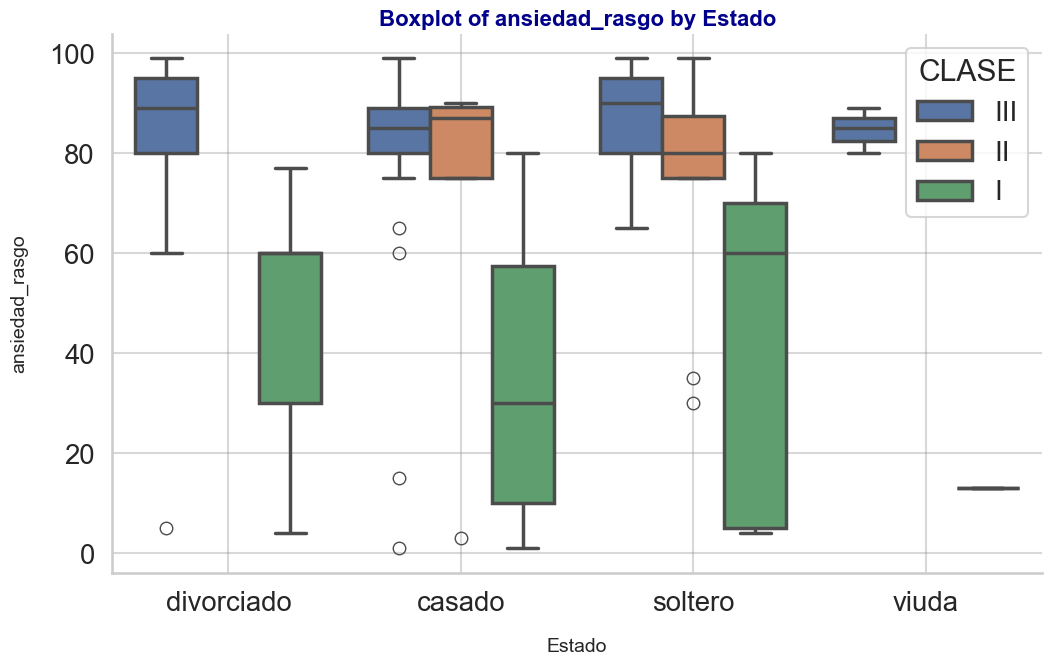

In [5]:
# Set Seaborn theme and context for consistency with previous style
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Boxplot with enhanced color palette and dodge parameter
sns.boxplot(x='Estado', y='ansiedad_rasgo', data=df_figure2, hue="CLASE", linewidth=2.5, dodge=True)

# Title and labels with enhanced font properties
plt.title('Boxplot of ansiedad_rasgo by Estado', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado', fontsize=14, labelpad=15)
plt.ylabel('ansiedad_rasgo', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()

From the printed ANOVA in **Table 2**, we can see that there is no statistically significant correlation between ansiedad_rasgo and estado, nor ansiedad_rasgo and clase, nor between the synergy of all three varaibles—given that all p-values are greater than 0.05. This lack of significance is then confirmed in **Figure 3**, where the x-axis is estado and the y-axis is ansiedad_rasgo. It is visibly obvious that all error bars for a given estado—and color coordinated for clase—overlap. Therefore, we can visually conclude that there is no correlation between the tested variables.


## Figure 4

From further analyzing **Figure 1**, we were able to determine that Estado and Edad were likely to have a statistically significant correlative relationship. Therefore, we decided to investigate this more thoroughly.

In order to further investigage the relationship between Estado and Edad, we perfermoned an ANOVA. We decided to perform an ANOVA due to there being four categories of Estado. The results of the ANOVA are visualized in **Figure 4**.

                 sum_sq     df        F        PR(>F)
C(Estado)   7530.426624    3.0  17.5472  1.693131e-09
Residual   17023.053050  119.0      NaN           NaN


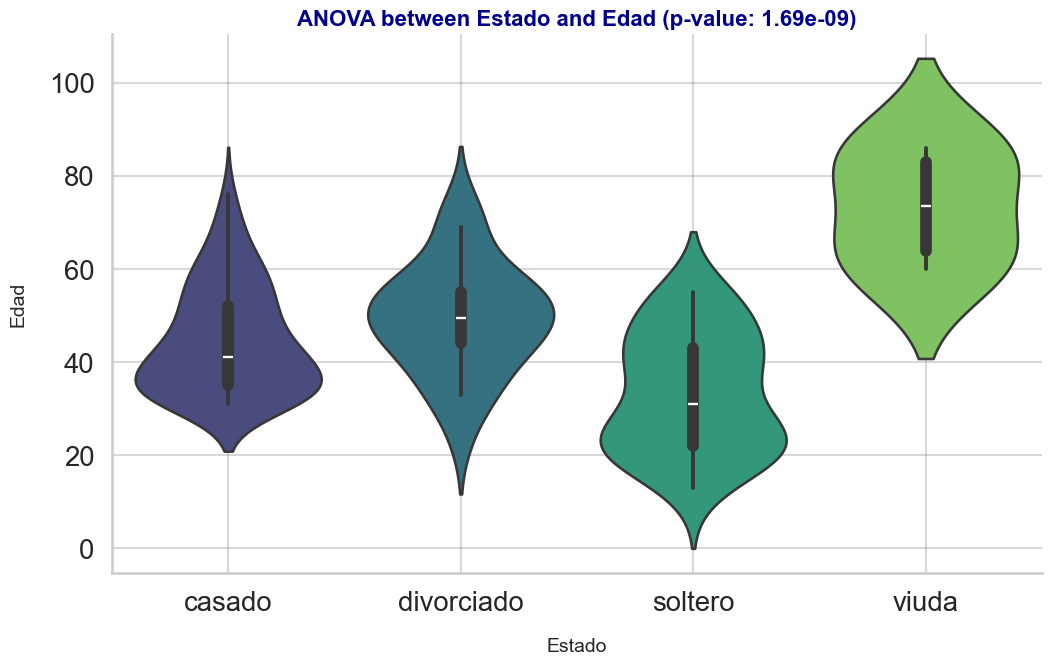

In [6]:
# Ensure 'Estado' is categorical
df['Estado'] = df['Estado'].astype('category')

# Fit a linear regression model (OLS)
model = ols('Edad ~ C(Estado)', data=df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Extract the p-value from the model
p_value = anova_table['PR(>F)'][0]

# Set the theme and context for seaborn
sns.set_theme(style="whitegrid")
sns.set_context("talk", font_scale=1.2)

# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Violin plot to visualize distribution of 'Edad' across levels of 'Estado'
sns.violinplot(x='Estado', y='Edad', data=df, palette='viridis')

# Title and labels with enhanced font properties
plt.title(f'ANOVA between Estado and Edad (p-value: {p_value:.2e})', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Estado', fontsize=14, labelpad=15)
plt.ylabel('Edad', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


Here, in **Figure 4**, we can visualize the relationship between Estado and Edad through a violin plot. The calculated p-value of the ANOVA is 1.69e-09, telling us that there is a statistically significant correlation between at least one state of estado and edad. Before submitting the final report, we will perform two-tailed t-tests on all states of estado to determine which one is statistically significant.

## Table 3, Figure 5

Next, we were curious about the correltation between angulo_convexidad, angulo_cuelloYtercio, and misophonia. First, we had to convert the discrete variable Misofonia.dic to a categorical variable: misofonia_binary. From here, we performed a t-test to determine the p-value of the correltation between angulo_convexidad and angulo_cuelloYtercio. Then, we performed two separate ANOVAs to test the synergistic correlation first between angulo_convexidad and misofonia_binary in terms of angulo_cuelloYtercio, and second between angulo_cuelloYtercio and misofonia_binary in terms of angulo_convexidad.

In [7]:
# Convert Misofonia.dic to a categorical value
df_clean = df
df_clean['Misofonia.dic'] = df_clean['Misofonia.dic'].astype('category')

# Rename Misofonia.dic for Misofonia_binary
df_clean.rename(columns={'Misofonia.dic': 'misofonia_binary'}, inplace=True)

# Calculate the correlation between Angulo_convexidad and Angulo_cuelloYtercio
correlation = df_clean['Angulo_convexidad'].corr(df_clean['Angulo_cuelloYtercio'])
print(f"Correlation: {correlation}")

# Compute the p-value for the correlation
n = df_clean[['Angulo_convexidad', 'Angulo_cuelloYtercio']].dropna().shape[0]
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))
p_value = 2 * (1 - stats.t.cdf(np.abs(t_stat), df=n-2))
print(f"P-value: {p_value}")


# ANOVA for Angulo_cuelloYtercio and misofonia_binary
model_cuelloYtercio = ols('Angulo_cuelloYtercio ~ C(misofonia_binary)*(Angulo_convexidad)', data=df_clean).fit()
anova_table_cuelloYtercio = sm.stats.anova_lm(model_cuelloYtercio, typ=2)

# Print the ANOVA table in a more readable format
print("\nANOVA for Angulo_cuelloYtercio and misofonia_binary:")
print(tabulate(anova_table_cuelloYtercio, headers='keys', tablefmt='pretty'))



Correlation: 0.8562753660189637
P-value: 0.0

ANOVA for Angulo_cuelloYtercio and misofonia_binary:
+---------------------------------------+--------------------+-------+--------------------+------------------------+
|                                       |       sum_sq       |  df   |         F          |         PR(>F)         |
+---------------------------------------+--------------------+-------+--------------------+------------------------+
|          C(misofonia_binary)          | 731.8748763710128  |  4.0  | 5.702611664979534  | 0.00032282525008512096 |
|           Angulo_convexidad           | 10092.58043684439  |  1.0  |  314.556866410137  | 1.9387351936239385e-34 |
| C(misofonia_binary):Angulo_convexidad | 496.52809219159144 |  4.0  | 3.8688401281948277 |  0.005533751898009081  |
|               Residual                | 3625.6133982350198 | 113.0 |        nan         |          nan           |
+---------------------------------------+--------------------+-------+------------

In **Table 3**, the numerical results are printed. First, we notice that the p-value for the correlation between angulo_convexidad and angulo_cuelloYtercio is percisely 0.0, suggesting a strong correlation. <br> In analyzing the first ANOVA, we can conclude that angulo_convexidad is neither correlated to misofonia_binary nor the synergy between misofonia_binary and angulo_cuelloYtercio; however, it is correlated directly to angulo_cuelloYtercio, which is further confirmation of the t-test. <br> In analyzing the second ANOVA,

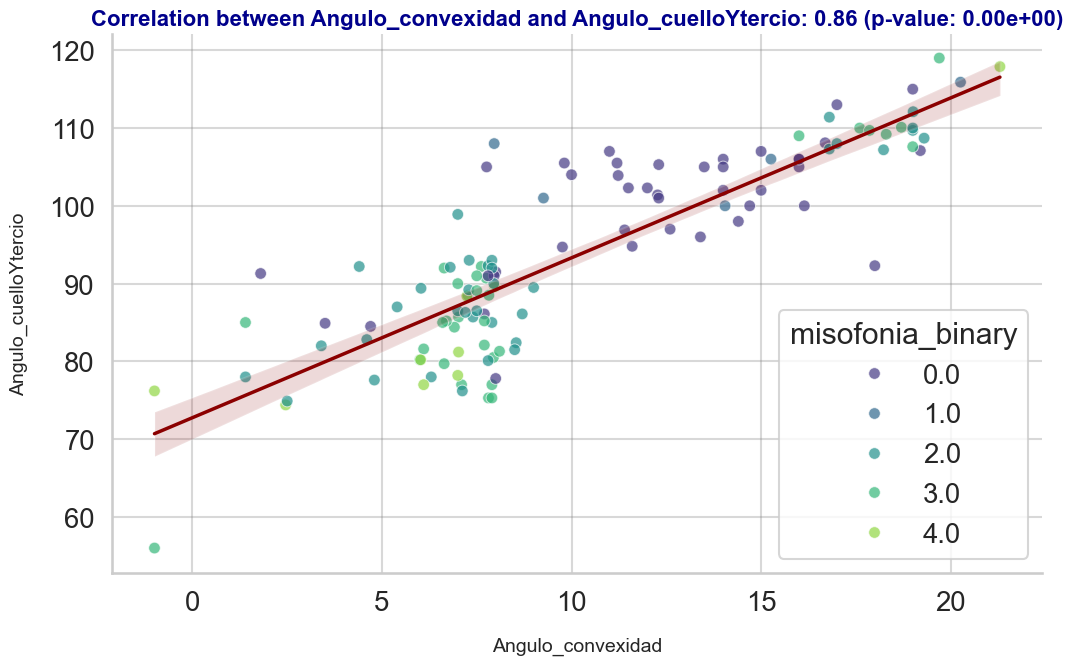

In [8]:
# Create figure and axis with larger dimensions for clarity
plt.figure(figsize=(12, 7), dpi=100)

# Scatterplot with regression line and hue
sns.scatterplot(x='Angulo_convexidad', y='Angulo_cuelloYtercio', hue='misofonia_binary', data=df_clean, 
                palette='viridis', s=70, alpha=0.7)
sns.regplot(x='Angulo_convexidad', y='Angulo_cuelloYtercio', data=df_clean, 
            scatter=False, line_kws={'color': 'darkred', 'lw': 2.5})  # Adjust regression line style

# Title and labels with enhanced font properties
plt.title(f'Correlation between Angulo_convexidad and Angulo_cuelloYtercio: {correlation:.2f} (p-value: {p_value:.2e})',
          fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Angulo_convexidad', fontsize=14, labelpad=15)
plt.ylabel('Angulo_cuelloYtercio', fontsize=14, labelpad=15)

# Lighten grid and remove top/right spines for a cleaner look
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show plot
plt.show()


In [9]:

# Assume there's a third variable (Z_variable) to plot in 3D
Z_variable = df_clean['misofonia_binary']

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df_clean['Angulo_convexidad'],  # X-axis is now Angulo_convexidad
    y=df_clean['Angulo_cuelloYtercio'],  # Y-axis is now Angulocabezaycuello
    z=Z_variable,
    mode='markers',
    marker=dict(
        size=8,
        color=df_clean['misofonia_binary'].cat.codes,  # Color by misofonia_binary categories
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='misofonia_binary')
    ),
    text=df_clean['misofonia_binary'],  # Show misofonia_binary on hover
)])

# Set titles and axis labels
fig.update_layout(
    title=f'3D Interactive Plot: Angulo_convexidad, Angulocabezaycuello, and Misofonia.dic',
    scene=dict(
        xaxis_title='Angulo_convexidad',  # Update X-axis label
        yaxis_title='Angulo_cuelloYtercio',  # Update Y-axis label
        zaxis_title='Misofonia.dic'
    ),
    margin=dict(l=0, r=0, b=0, t=40),
)

# Show the interactive plot
fig.show()


In [10]:
def compute_golden_ratio(convexity_angle, mandibular_protrusion, subnasal_distance):
    # Ratios we want to compare with the golden ratio
    golden_ratio = 1.618
    
    # Calculate ratios
    ratio1 = subnasal_distance / mandibular_protrusion  # example vertical ratio
    ratio2 = convexity_angle / mandibular_protrusion    # facial structure symmetry
    
    # Compute closeness to golden ratio
    diff1 = abs(golden_ratio - ratio1)
    diff2 = abs(golden_ratio - ratio2)
    
    # Average of the differences (a closer score to 0 indicates proximity to the golden ratio)
    average_diff = (diff1 + diff2) / 2
    
    return {
        'ratio1': ratio1, 
        'ratio2': ratio2, 
        'average_diff_from_golden_ratio': average_diff
    }


df_expanded=df.copy()
df_expanded.drop(columns=['Misofonia', 'Estado', 'ansiedad.medicada', 'Sexo', 'CLASE'], inplace=True)
# Impute only numeric variables with the median
numeric_columns = df_expanded.select_dtypes(include=[np.number]).columns
df_expanded[numeric_columns] = df_expanded[numeric_columns].fillna(df_expanded[numeric_columns].median())

# Compute the Golden Ratio
df_expanded["Golden_Ratio"] = compute_golden_ratio(df_clean["Angulo_convexidad"], df_clean["protusion.mandibular"],  df_clean["Subnasal_H"])["average_diff_from_golden_ratio"]

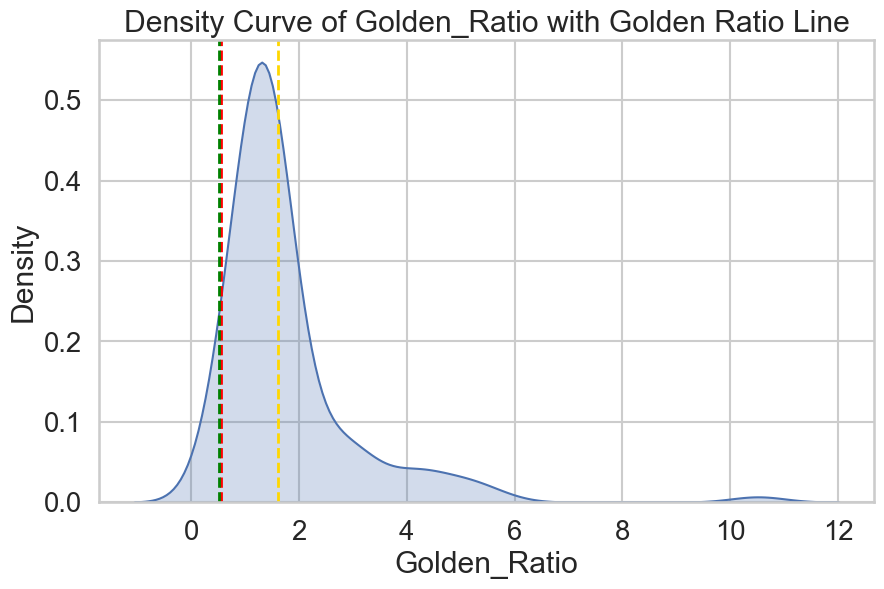

In [11]:
andres = {"convexity_angle": 13, "mandibular_protrusion": 9.7, "subnasal_distance": 7.5}
albert = {"convexity_angle": 12.6, "mandibular_protrusion": 9.4, "subnasal_distance": 8.2}

plt.figure(figsize=(10, 6))

# Plot density curve for Golden_Ratio
sns.kdeplot(data=df_expanded, x='Golden_Ratio', fill=True)

# Draw an x-axis line at 1.618 (Golden Ratio)
plt.axvline(x=1.618, color='#FFD700', linestyle='--', linewidth=2)  # Golden color

# Draw in the x-axis for Andres and Albert's golden ratio
plt.axvline(x=compute_golden_ratio(andres["convexity_angle"], andres["mandibular_protrusion"], andres["subnasal_distance"])["average_diff_from_golden_ratio"], 
            color='red', linestyle='--', linewidth=2)
plt.axvline(x=compute_golden_ratio(albert["convexity_angle"], albert["mandibular_protrusion"], albert["subnasal_distance"])["average_diff_from_golden_ratio"], 
            color='green', linestyle='--', linewidth=2)


# Add title and labels
plt.title('Density Curve of Golden_Ratio with Golden Ratio Line')
plt.xlabel('Golden_Ratio')
plt.ylabel('Density')

# Show plot
plt.show()


In [12]:
from scipy.stats import shapiro

# Run the Shapiro-Wilk test for normality
stat, p_value = shapiro(df_expanded['Golden_Ratio'].values, nan_policy='omit')

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print("The Golden_Ratio column follows a normal distribution (fail to reject H0)")
else:
    print("The Golden_Ratio column does not follow a normal distribution (reject H0)")

Shapiro-Wilk Test Statistic: nan
P-value: 1.0
The Golden_Ratio column follows a normal distribution (fail to reject H0)


Clustering Analysis

In [13]:
df_tidy=df.copy()
df_tidy = df_tidy.drop(columns=['Misofonia', "misofonia_binary",'Estado', 'ansiedad.medicada',"ansiedad.dif","depresion","ansiedad.rasgo","ansiedad.estado"])
# encode the categoial variables Sexo and CLASE to numeric
df_tidy = pd.get_dummies(df_tidy, columns=['Sexo', 'CLASE'], drop_first=True)
# fill NaN values with the median of the column
df_tidy = df_tidy.fillna(df_tidy.median())




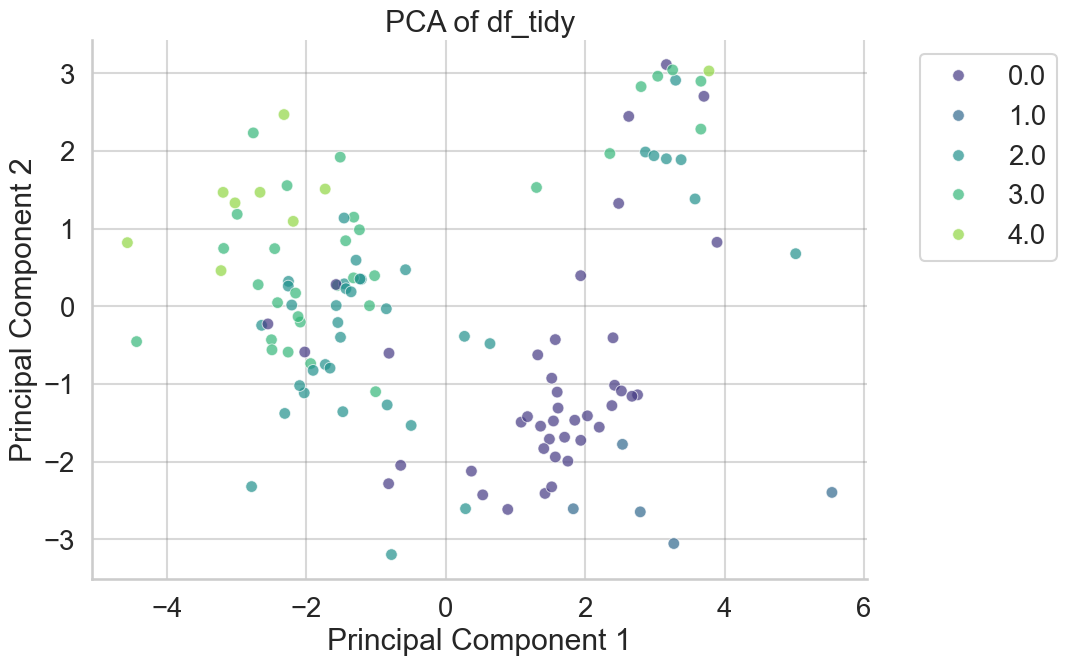

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
df_tidy_scaled = scaler.fit_transform(df_tidy)

# Perform PCA
pca = PCA(n_components=2)  # You can change the number of components
principal_components = pca.fit_transform(df_tidy_scaled)

# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the PCA result
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue=df_clean['misofonia_binary'], data=df_pca, palette='viridis', s=70, alpha=0.7)
plt.title('PCA of df_tidy')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, color='gray', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend to the right
plt.show()


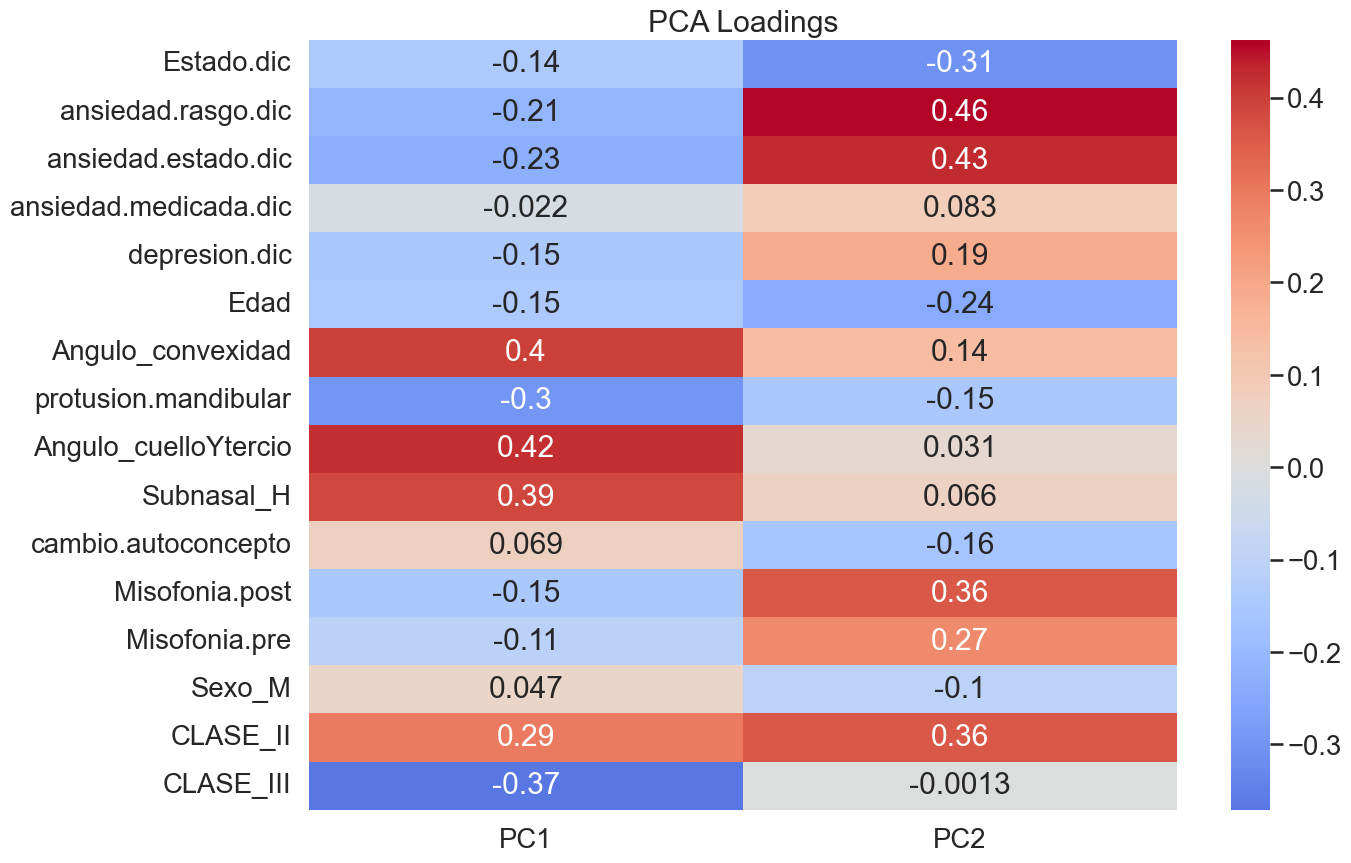

In [15]:
# Extract the loadings (components)
loadings = pca.components_.T

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=df_tidy.columns)

# Plot the loadings
plt.figure(figsize=(14, 10))  # Increase the figure size
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('PCA Loadings')
plt.show()